In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Bangalore.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Kolkata.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Chennai.csv


In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [3]:
delhi=pd.read_csv("/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv")

In [4]:
print(delhi)

         Price  Area          Location  No. of Bedrooms  Resale  \
0     10500000  1200  Sector 10 Dwarka                2       1   
1      6000000  1000       Uttam Nagar                3       0   
2     15000000  1350      Sarita Vihar                2       1   
3      2500000   435       Uttam Nagar                2       0   
4      5800000   900        Dwarka Mor                3       0   
...        ...   ...               ...              ...     ...   
4993   2500000   540       Madhu Vihar                2       1   
4994   3000000   540       Madhu Vihar                2       1   
4995   2600000   415  Sector 26 Dwarka                1       1   
4996   5500000   415  Sector 26 Dwarka                1       1   
4997   4200000   900       Uttam Nagar                3       1   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
0                    0          1             0                  0   
1                    0          0             0        

In [5]:
delhi.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [6]:
delhi.rename(columns={"No. of Bedrooms":"Bedrooms", "24X7Security":"Security","Children'splayarea":"Playarea"}, inplace=True)

In [7]:
y1=np.log(delhi["Price"])

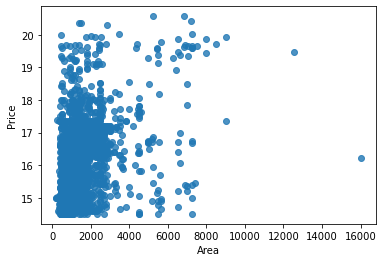

In [8]:
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)

In [9]:
delhi.drop(delhi[delhi["Area"]>=8000].index,inplace=True)


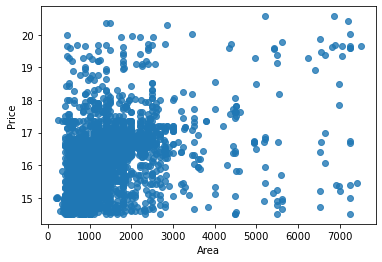

In [10]:
y1=np.log(delhi["Price"])
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)

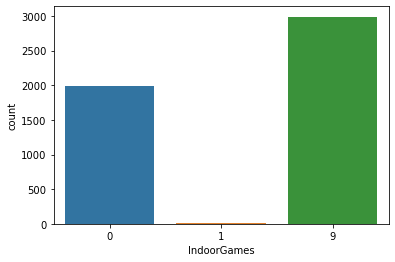

In [11]:
sns.countplot(x=delhi["IndoorGames"],data=delhi)

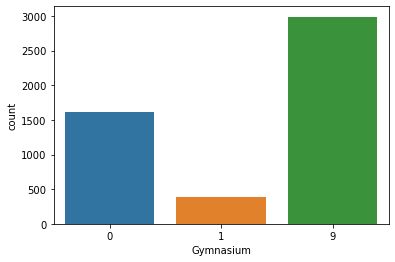

In [12]:
sns.countplot(x=delhi["Gymnasium"],data=delhi)

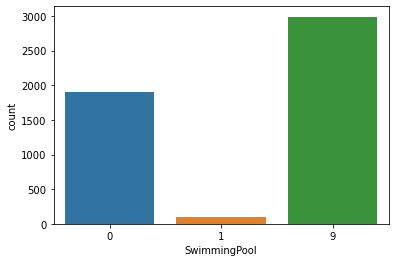

In [13]:
sns.countplot(x="SwimmingPool",data=delhi)

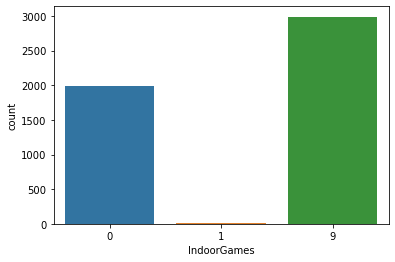

In [14]:
sns.countplot(x=delhi["IndoorGames"],data=delhi)

Similarly for other aminities we can see that the number of not mentioned are very large. This will not help us in predicting the accurate price of the property. So we will remove all the rows containing not mentioned or 9

In [15]:
delhi.replace(9,np.nan,inplace=True)
delhi.dropna(axis=0,how="any",inplace=True)

In [16]:
le_location=LabelEncoder()
delhi["Location"]=le_location.fit_transform(delhi["Location"])


x1=delhi.drop(["Price","MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=False)
x1=sm.add_constant(x1)
y1=np.log(delhi["Price"])
model=sm.OLS(y1,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     538.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:44:30   Log-Likelihood:                -583.76
No. Observations:                2002   AIC:                             1208.
Df Residuals:                    1982   BIC:                             1320.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.3230    

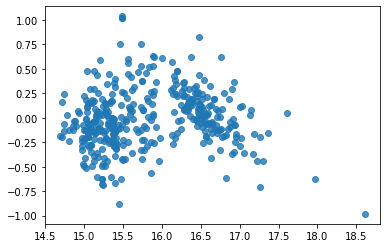

In [17]:
delhi.drop(["MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=True)

x=delhi.drop("Price",axis=1,inplace=False)
x=x.values
y=np.log(delhi["Price"]).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lgr=LinearRegression(fit_intercept=True)
model_1=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)
residual=y_test-prediction
sns.regplot(prediction,residual,fit_reg=False)

In [18]:
print(model_1.score(x_test,y_test))

0.8576641158515689


In [19]:
print(r2_score(y_test,prediction))

0.8576641158515689


In [20]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

0.291147935425969
